<a href="https://colab.research.google.com/github/igor531205/neural_network/blob/main/lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras.

## Задача. Обучите Neural Network от Keras для распознавания рукописных цифр.

In [1]:
from google.colab import files
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
import cv2

# для работы с графиками в интерактивном режиме
%matplotlib inline

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

# отключаем предупреждения
warn.filterwarnings('ignore')

*Для этой задачи используем готовый датасет MNIST от Keras*

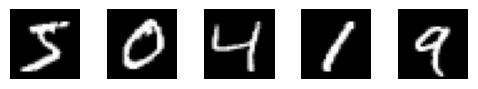

In [2]:
# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Количество изображений для отображения
num_images = 5

# Размер изображений
image_size = 1

# Количество строк и столбцов для отображения изображений
rows = 1
cols = np.ceil(num_images / rows).astype(int)

# Подготовка к отображению изображений
fig_rows = int(rows * image_size)
fig_cols = int(cols * image_size)
fig, axes = plt.subplots(rows, cols, figsize=(fig_cols, fig_rows))
axes = axes.flatten()

# Отображение изображений
for i, ax in enumerate(axes):
    if i < num_images:
        ax.imshow(x_train[i], cmap='gray')
        ax.axis('off')
    else:
        ax.axis('off') # Скрытие осей без изображений

plt.tight_layout()
plt.show()

In [3]:
num_class = np.unique(y_train)
num_class

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
# Приведем все значения к диапазону от 0 до 1.
x_train = x_train / 255.0
x_test = x_test / 255.0

# Изменение формы данных, чтобы каждое изображение имело размерность (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Преобразование меток в формат one-hot encoding (вектор длиной - число классов)
class_len = len(num_class)
y_train = to_categorical(y_train, class_len)
y_test = to_categorical(y_test, class_len)

In [5]:
# Создание модели
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1528 - accuracy: 0.9542 - val_loss: 0.0646 - val_accuracy: 0.9789
Epoch 2/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0522 - accuracy: 0.9836 - val_loss: 0.0439 - val_accuracy: 0.9853
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0538 - val_accuracy: 0.9822
Epoch 4/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.0376 - val_accuracy: 0.9881
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0509 - val_accuracy: 0.9846


In [6]:
# Функция преобразования изображения под модель
def preprocess_image(image_path):

    # Загрузка изображения
    image = load_img(image_path, color_mode="grayscale", target_size=(28, 28))

    # Преобразование изображения в массив
    image = img_to_array(image)

    # Нормализация значений к диапазону от 0 до 1.
    image /= 255.0

    # Изменение формы изображения к размерности (28, 28, 1)
    image = np.reshape(image, (1, 28, 28, 1))

    return image

*Загрузим изобраение для распознавания*

Saving 3.png to 3.png


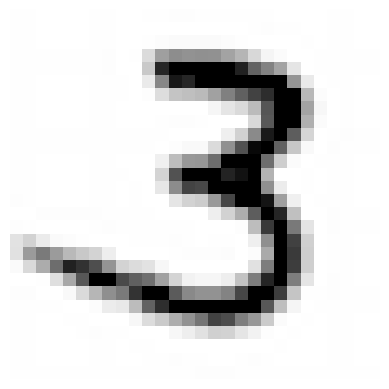

1/1 [==============================] - 0s 24ms/step
На изображении цифра: [3]


In [8]:
# Загрузка файла
uploaded = files.upload()

# Получение имени загруженного файла
filename = next(iter(uploaded))

# Чтение изображения
uploaded_image = cv2.imread(filename)

# Отображение изображения
plt.imshow(uploaded_image)
plt.axis('off')
plt.show()

# Предобработка изображения
preprocessed_image = preprocess_image(filename)

# Делаем предсказание
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions, axis=1)
print("На изображении цифра:", predicted_class)